![title](img/1.png)
## DECISION TREE
Decision tree merupakan salah satu dari algoritma machine learning yang dapat digunakan untuk melakukan klasifikasi dan juga regresi, pada module kali ini kita akan menggunakan decision tree sebagai algoritma klasifikasi

## Langkah-langkah:

1. Import module
2. Persiapan Data 
3. EDA (Exploratory Data Analysis)
4. Data Preparation
5. Pembuatan model machine learning
6. Validasi Model    
7. Klasifikasi

# INSTALL MODULE TAMBAHAN: 
* conda install python-graphviz
* conda install graphviz


## 1. Import Module
Langkah pertama yang akan kita lakukan adalah melakukan import module yang akan dipakai selama klasifikasi ini berlangsung


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 2. Persiapan Data
Pada langkah kali ini, kita akan mencari data yang akan kita gunakan, pada klasifikasi kali ini, data yang kita gunakan merupakan data obat untuk  pemilihan obat berdasarkan kondisi pasien

Terdapat beberapa feature / atribut didalam dataset ini antara lain:
* Age >> Umur dari pasien
* Sex >> Jenis kelamin pasien
* BP >> Blood Pressure / Tekanan darah dari pasien
* Cholesterol >> Tingkat kolestrol pasien
* Na_to_K >> Natrium / Kalium dalam darah
* Drug >> Jenis obat yang digunakan

https://www.kaggle.com/gangliu/drugsets

![title](img/dataset.png)


In [2]:
#Load data & tampilkan 5 baris teratas
df = pd.read_csv('dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## 3. EDA (Exploratory Data Analysis)
EDA merupakan proses analisis data, pada proses ini kita mencari suatu pattern dan insight dari suatu data, dimana hasil dari eksplorasi ini akan digunakan untuk memudahkan kita dalam membuat model machine learning nanti

In [3]:
#Output informasi penting pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
#Cek nilai pada setiap feature / column
for col in df.columns:
    print(f'{df[col].value_counts()}\n\n')

47    8
49    7
23    7
28    7
39    6
32    6
50    5
22    5
58    5
37    5
60    5
43    4
42    4
41    4
74    4
51    4
34    4
31    4
26    4
24    4
20    4
36    4
45    4
72    4
56    4
57    4
68    4
67    4
65    4
61    4
64    3
35    3
16    3
18    3
70    3
69    3
53    3
15    3
40    3
38    3
59    3
55    2
48    2
19    2
46    2
73    2
52    2
66    2
29    2
62    2
33    1
25    1
21    1
30    1
54    1
17    1
63    1
Name: Age, dtype: int64


M    104
F     96
Name: Sex, dtype: int64


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


12.006    2
18.295    2
9.945     1
9.475     1
20.013    1
         ..
13.884    1
7.285     1
22.905    1
7.340     1
8.750     1
Name: Na_to_K, Length: 198, dtype: int64


drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64




In [5]:
#Cek apakah terdapat data kosong atau tidak, outputkan dalam persentase
df.isna().sum() / len(df)

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [6]:
#Cek apakah terdapat instance yang duplikat atau tidak
df[df.duplicated() == True]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


Dari eksplorasi data yang kita lakukan, tidak ditemukan nilai kosong / NaN dan juga nilai yang duplikat, kita dapat lanjut ke langkah berikutnya

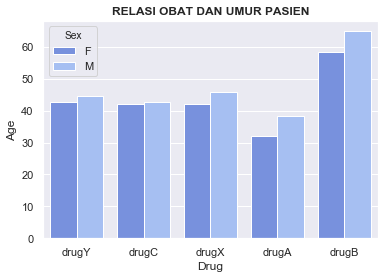

In [7]:
#Cek relasi obat dan umur pasien
sns.set()
sns.set_palette('coolwarm')
sns.barplot('Drug','Age',hue='Sex',ci=None,data=df)
plt.title('RELASI OBAT DAN UMUR PASIEN',fontweight='bold')
plt.show()

Text(0.5, 1.0, 'PERBANDINGAN PENGGUNAAN OBAT')

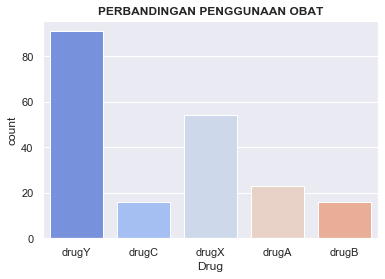

In [8]:
#Cek perbandingan penggunaan obat
sns.countplot('Drug',data=df)
plt.title('PERBANDINGAN PENGGUNAAN OBAT',fontweight='bold')

Orang yang berumur lebih dari 50 tahun cenderung menggunakan drug B, sedangkan untuk jumlah penggunaan obat drug Y merupakan obat yang paling sering digunakan

## 4. Data Preparation
Saat ini kita akan melakukan cleaning data agar data ini dapat dimasukan kedalam model machine learning, kita akan mengganti column 'Sex' 'BP' 'Cholesterol' yang bermupakan columns category menjadi angka agar dapat dimasukan kedalam model machine learning

karena column Sex merupakan binominal (ya / tidak) dan column BP, Cholesterol merupakan skala ordinal dalam statistika (https://id.wikipedia.org/wiki/Skala_(statistik)) dan bukan skala nominal, kita bisa menyimpulkan bahwa data yang metode penggantian kategori menjadi angka yang kita gunakan adalah LabelEncoder  (skala nominal menggunakan OneHot Encoder)


![title](img/ordinal.png)
![title](img/nominal.png)


dikarenakan jumlah nilai yang sedikit, kita akan melakukan LabelEncoder secara manual, namun apabila nilai yang terdapat dalam column ada banyak, kalian bisa menggunakan module LabelEncoder dari sklearn

In [9]:
#Outputkan nilai dari setiap column category
for col in df.select_dtypes(include=['object']):
    print(f'{df[col].value_counts()}\n\n')

M    104
F     96
Name: Sex, dtype: int64


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64




In [10]:
#Mapping nilai yang akan di ganti menggunakan Dictionary pada python
Sex         = {'M':1, 'F':0}
BP          = {'HIGH':2, 'NORMAL':1, 'LOW': 0}
Cholesterol = {'HIGH':1, 'NORMAL':0}

In [11]:
#Menukar nilai column
df['Sex']           = df['Sex'].replace(Sex)
df['BP']            = df['BP'].replace(BP)
df['Cholesterol']   = df['Cholesterol'].replace(Cholesterol)

In [12]:
#Output 5 baris teratas untuk cek apakah nilai sudah berganti atau belum
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


Langkah selanjutnya kita akan memecah data menjadi 2 kategori yaitu feature X dan target variable y

dilanjutkan dengan memecah data tadi menjadi 25% untuk test, dan 75% data untuk training, kita akan menggunakan module dari sklearn untuk memudahkan pekerjaan kita

In [13]:
#Pecah data menjadi feature X dan target variable y
y   = df['Drug']
X   = df.drop('Drug',axis=1)

In [14]:
#Pecah menjadi 75% train set dan 25% test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

## 5. Pembuatan model Machine learning
langkah ini merupakan langkah dimana kita akan membuat model machine learning, algoritma yang kita gunakan merupakan decision tree dimana feature akan diurutkan berdasarkan nilai information gain yang paling besar ke kecil

# DECISION TREE
![title](img/pengertian.png)

merupakan algoritma supervised learning yang dapat digunakan untuk klasifikasi dan juga regresi

bagian root (node paling atas) merupakan feature yang memiliki nilai information gain paling besar, lalu disusul dengan feature dengan information gain yang dibawahnya hingga pada akhirnya pada bagian daun (node) diputuskan hasil klasifikasi / regresi yang dilakukan

Kelebihan:
* Tidak memerlukan preprosessing data numeric (melakukan standarisasi berdasarkan variance) 
* Menangani kolinearitas secara efisien
* Decision tree memberikan penjelasan yang mudah dimengerti atas prediksi yang didapatkan


Kekurangan:
* Memiliki peluang overfit model apabila membangun model pohon dengan kemurnian tinggi (jumlah turunan pohon / ranting sangatlah banyak)
* Rawan terhadap pencilan
* Pohon bisa menjadi kompleks pada saat melatih dataset yang rumit
* Apabila data latih terdapat nilai kontinu, maka informasi didalamnya dapat hilang

untuk penjelasan lebih detail, silahkan menonton video berikut ini:
https://www.youtube.com/watch?v=qDcl-FRnwSU

In [15]:
#Panggil algoritma decision tree dan lakukan training menggunakan training data
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 6. Validasi model
kita akan melakukan pengecekan akurasi pada model yang telah kita buat

In [16]:
#Cek akurasi model
accuracy_score(y_test,dt.predict(X_test))

0.98

In [17]:
#Cek score F1 model
print(classification_report(y_test,dt.predict(X_test)))

precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        23

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.99        50
weighted avg       0.98      0.98      0.98        50



Hebat! model kita memiliki akurasi diatas 80%, namun pada saat melakukan pengecekan F1 score akan terdapat label dengan F1 Score yang agak rendah, hal tersebut maklum dikarenakan jumlah data yang tidak seimbang, dan tidak dilakukannya hyperparameter tuning pada model yang telah kita buat

In [18]:
#Cek sebaran data Drug
y.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

Disini kita bisa lihat bahwa benar adanya jumlah data yang kita miliki tidaklah merata, karena ini hanya latihan maka praktik seperti ini tidak apa, namun pada real world case, hal ini tidak boleh dilakukan sehingga pada real world case kita harus memastikan bahwa jumlah data yang kita miliki itu seimbang

Oke karena model yang sudah kita buat siap untuk dideploy, mari kita melakukan suatu prediksi berdsasarkan ketentuan:

* Umur: 40
* Sex: Perempuan
* BP: Low
* Cholestrol: Low
* Na_to_K: 12

apakah obat yang direkomendasikan merupakan DrugX?

In [19]:
#Melakukan Prediksi
dt.predict([[40,0,0,0,12]])

array(['drugX'], dtype=object)

![title](img/2.png)


Kelebihan dari decision tree ialah karena algoritma ini menggunakan nilai information gain untuk klasifikasi, kita dapat melihat komponen apa yang paling berpengaruh dalam klasifikasi, kita akan melihat feature dengan 2 cara yaitu menggunakan feature_importances_ dan juga menggunakan visualisasi pohon

In [20]:
#Melihat feature yang paling berpengaruh melalui nilai gini 
print(dict(zip(df.columns, dt.feature_importances_)))

{'Age': 0.13512260389206093, 'Sex': 0.0, 'BP': 0.32950836900745195, 'Cholesterol': 0.058452148826825354, 'Na_to_K': 0.47691687827366164}


Disini kita mengetahui bahwa urutan feature yang paling berpengaruh ke kurang berpengaruh adalah:
* Na_to_K
* BP
* Age
* Cholesterol
* Sex (Tidak berpengaruh sama sekali)

In [21]:
#Membuat visualisasi pohon ke dalam file pdf dengan nama Decision Tree
dot_data = export_graphviz(dt,out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True,rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)                            
graph.render('Decision Tree')

'Decision Tree.pdf'

# CONTOH VISUALISASI HASIL YANG TELAH JADI 
![title](img/pohon.png)

# TUGAS!
Lakukan prediksi sebagai pengganti absensi kehadiran module decisoin tree!

Tugas 1:
* Umur: 25
* Sex: Laki-laki
* BP: High
* Cholestrol: High
* Na_to_K: 25


Tugas 2:
* Umur: 50
* Sex: Laki-Laki
* BP: High
* Cholestrol: High
* Na_to_K: 50


Tugas 3:
* Umur: 25
* Sex: Perempuan
* BP: High
* Cholestrol: High
* Na_to_K: 25

tugas bisa dikumpulkan dengan format:

* Nama:
* Hari SG:


* tugas1: jawaban
* tugas2: jawaban
* tugas3: jawaban

dikumpulkan dengan via chat idline: arasyfajar 

paling lambat 19 april 2020